In [19]:
# 최신코드
import dlib
import cv2
import glob
from PIL import Image, ImageOps
import numpy as np
import openface
import os

count = int(input('몇 명을 등록하시나요?: ex)4'))
adr = input('학습 데이터를 저장할 폴더 경로를 알려주세요: ex) /home/gpulab/Dev/Classification/whoisit/dataset/train/')
project = os.path.abspath(__file__)

fail_get_face = []
fail_to_crop = []

for i in range(count):
    face_detector = dlib.get_frontal_face_detector()
    crop_count = 0

    set_path = input('등록할 사람의 폴더명을 지정해주세요: ex)고길동')
    os.chdir(adr)

    try:
        if not(os.path.isdir(set_path)):
            os.makedirs(os.path.join(set_path))
    except OSError as e:
        if e.errno != errno.EEXIST:
            print("디렉토리 생성 실패")
            raise
    os.chdir(project)

    data_path = adr + set_path
    predictor_path = './shape_predictor_68_face_landmarks.dat'
    predictor = dlib.shape_predictor(predictor_path)
    face_aligner = openface.AlignDlib('./shape_predictor_68_face_landmarks.dat')

    #데이터 로드
    face_set = glob.glob('./dataset/face/'+set_path+'/*.jpg')


    for i in range(len(face_set)):
        #이미지 데이터 1개씩 로드
        img = cv2.imread(face_set[i])
        
        #얼굴 디텍트
        faces = face_detector(img,1)
        
        #디텍트 된 얼굴 수에 따른 반응 설정
        if len(faces) >= 1:
            print("얼굴 검출 성공 =>", face_set[i])

            # 인식된 얼굴 개수만큼 반복하여 얼굴 윤곽을 표시
            for k, d in enumerate(faces):
                # k 얼굴 인덱스
                # d 얼굴 좌표
                print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}"
                .format(k, d.left(), d.top(), d.right(), d.bottom()))

                shape = predictor(img, d)
                # print("Part 0: {}, Part 1: {} ...".format(shape.part(0),shape.part(1)))

                #랜드마크 리스트 생성
                landmark_list = []

                #코에 빨강 찍기
                for p in shape.parts():
                    landmark_list.append([p.x, p.y])
                    if p.x == shape.parts()[30].x and p.y == shape.parts()[30].y:
                        # cv2.circle(img, (p.x, p.y), 1, (0, 0, 255), -1)
                        face_center_x = shape.parts()[30].x
                        face_center_y = shape.parts()[30].y
                        nose = shape.parts()[30]
                    else:
                        pass
                        # cv2.circle(img, (p.x, p.y), 1, (0, 255, 0), -1)

                try:
                    crop = img[faces[i].top():faces[i].bottom(),
                    faces[i].left():faces[i].right()]
                except:
                    print("crop하기 어려운 사진:", face_set[i])
                    fail_to_crop.append(face_set[i])
                    pass
                
                alignedFace = face_aligner.align(532, img, d,
                landmarkIndices=openface.AlignDlib.INNER_EYES_AND_BOTTOM_LIP)    

                file_name = str(crop_count)+".jpg"
                data_path_a = data_path + '/' + file_name
                alignedFace = cv2.resize(alignedFace, (440, 400), interpolation = cv2.INTER_AREA)

                cv2.imwrite(data_path_a, alignedFace)
                crop_count += 1

        elif len(faces) == 0:
                print('얼굴 검출 실패 =>',face_set[i])
                fail_get_face.append(face_set[i])
                pass
        else:
            pass

    print(len(face_set),'장의 사진 중',crop_count,'개의 얼굴 검출, Crop 완료')



os.chdir(project)

#실패한 결과 저장
try:
    if not(os.path.isdir('fail_history')):
        os.makedirs(os.path.join('fail_history'))
except OSError as e:
    if e.errno != errno.EEXIST:
        print('fail_history Directory exist')
        raise

with open('/fail_history/fail_to_crop.txt', 'w') as f:
    for line in fail_to_crop:
        f.write(line)
with open('/fail_history/fail_get_face.txt', 'w') as f:
    for line in fail_get_face:
        f.write(line)

if os.path.isdir('/fail_history/fail_get_face.txt') and os.path.isdir('/fail_history/fail_to_crop.txt') == True:
    print('실패 결과 리스트 작성 완료')
elif os.path.isdir('/fail_history/fail_get_face.txt') == True:
    print('얼굴 검출 실패 리스트 작성 완료')
elif os.path.isdir('/fail_history/fail_to_crop.txt') == True:
    print('학습용 얼굴 데이터 저장 실패 리스트 작성 완료')
else:
    print('실패 결과 데이터 없음')


#Crop 코드 종료
print('AI 학습 데이터 셋 구축 완료')



NameError: name '__file__' is not defined

In [13]:
data_path_a

'./dataset/train/B2029/.jpg'

In [87]:
print(faces[0].top(),"top")
print(faces[0].bottom(),"bottom")
print(faces[0].right(),"right")
print(faces[0].left(),"left")

291 top
514 bottom
736 right
513 left


In [106]:
# cv2.rectangle(img, (513,291), (736,514), (0,255,255), 3)
# face_set

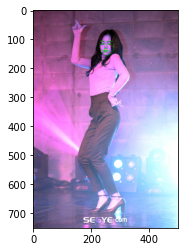

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import openface

height, width = img.shape[:2]
M = np.float32([[1, 0, 0], [0, 1, 0]]) # 이미지를 오른쪽으로 100, 아래로 25 이동시킵니다.

# 랜드마크를 이용해 얼굴을 정렬할 클래스 생성 - Openface

# 매개변수로 랜드마크 모델
face_aligner = openface.AlignDlib('./shape_predictor_68_face_landmarks.dat')

img_translation = cv2.warpAffine(img, M, (width,height))
cv2.rectangle(img_translation, (513,291), (736,514), (0,255,255), 3)
plt.imshow(img_translation)

In [32]:
    
'''	    
인식된 랜드마크를 openface를 이용해 변환
532 - imgDim
    이미지 크기 532는 532x532 이미지로 반환하겠다는 뜻 
image - rgbImg
    변환 시킬 원본 이미지 : (높이, 너비, 3)
face_rect - bb
    얼굴 위치 (rect)
landmarkIndices
    변환 대상의 인덱스.
    openface.AlignDlib.OUTER_EYES_AND_NOSE
        [36, 45, 33]
    openface.AlignDlib.INNER_EYES_AND_BOTTOM_LIP
        [39, 42, 57]
'''
alignedFace = face_aligner.align(532, img, d, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)    
'''
alignedFace 는 RGB(ndarray) 이미지      
'''

    # aligned_face_x.jpg 로 저장 
cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)

True

In [4]:
1 % 2

1

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16640687818253341258,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4949437312
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17321225238850158088
 physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"]